In [26]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

# === 1a. Pengumpulan & Penyesuaian Format ===
df_raw = pd.read_csv("RegresiUTSTelkom.csv", header=None)
data_flat = df_raw[0].astype(float).values

# Ubah ke bentuk [n_samples, n_features] (91 angka per baris)
n_features = 91
n_samples = len(data_flat) // n_features  # jumlah baris utuh yang bisa dibentuk
data_trimmed = data_flat[:n_samples * n_features]
data_reshaped = data_trimmed.reshape(-1, n_features)
df = pd.DataFrame(data_reshaped)
print(f"✅ DataFrame final: {df.shape} (baris, kolom)")

# === 1b. Pisahkan fitur dan target ===
X = df.iloc[:, :-1].values  # Semua kolom kecuali terakhir
y = df.iloc[:, -1].values   # Kolom terakhir sebagai target

# === 1c. Feature Engineering: Scaling ===
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# === 1d. Modeling ===
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

models = {
    "LinearRegression": LinearRegression(),
    "PolynomialRegression (deg=2)": Pipeline([
        ("poly", PolynomialFeatures(degree=2)),
        ("linreg", LinearRegression())
    ]),
    "DecisionTree": DecisionTreeRegressor(),
    "KNN": KNeighborsRegressor(),
    "Bagging": BaggingRegressor(),
    "AdaBoost": AdaBoostRegressor(),
    "GradientBoosting": GradientBoostingRegressor(),
    "SVR": SVR()
}

from sklearn.metrics import mean_squared_error, r2_score

# Evaluasi model
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)  # hitung RMSE manual
    r2 = r2_score(y_test, y_pred)
    results[name] = {"RMSE": rmse, "MSE": mse, "R2": r2}

# Tampilkan hasil
results_df = pd.DataFrame(results).T
print("\n=== Evaluasi Model Regresi ===")
print(results_df)


✅ DataFrame final: (5663, 91) (baris, kolom)

=== Evaluasi Model Regresi ===
                                    RMSE           MSE          R2
LinearRegression                6.651009     44.235917    0.592087
PolynomialRegression (deg=2)  115.879912  13428.153926 -122.825014
DecisionTree                    9.397423     88.311562    0.185653
KNN                             7.925636     62.815711    0.420758
Bagging                         6.977508     48.685613    0.551055
AdaBoost                       13.754567    189.188104   -0.744560
GradientBoosting                6.493897     42.170693    0.611131
SVR                             7.601984     57.790157    0.467100


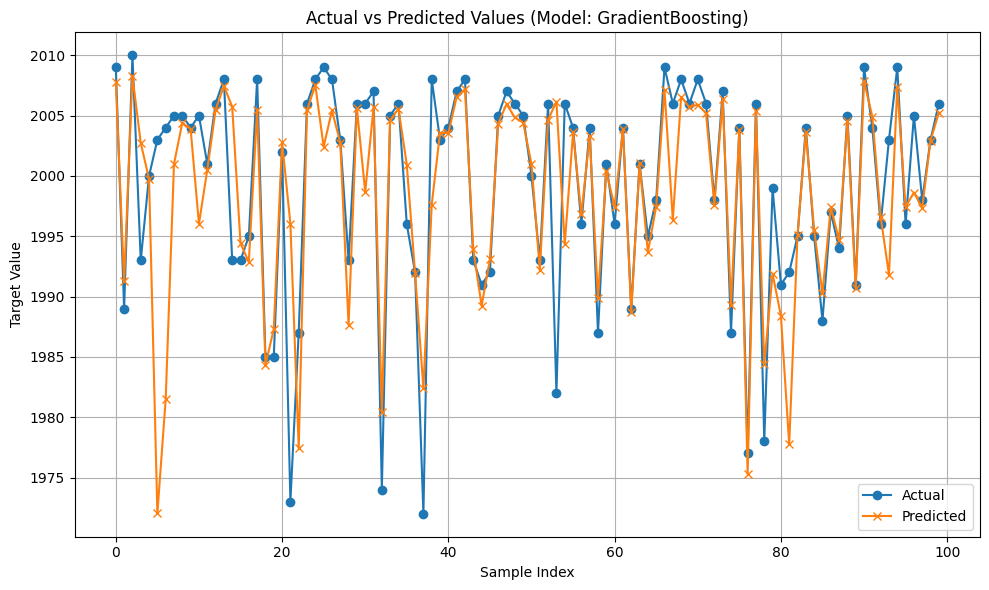

In [27]:
import matplotlib.pyplot as plt

# Ambil model terbaik berdasarkan nilai R² tertinggi
best_model_name = results_df['R2'].idxmax()
best_model = models[best_model_name]

# Prediksi ulang dengan model terbaik
y_pred_best = best_model.predict(X_test)

# Visualisasi Prediksi vs Aktual
plt.figure(figsize=(10, 6))
plt.plot(y_test[:100], label='Actual', marker='o')
plt.plot(y_pred_best[:100], label='Predicted', marker='x')
plt.title(f'Actual vs Predicted Values (Model: {best_model_name})')
plt.xlabel('Sample Index')
plt.ylabel('Target Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

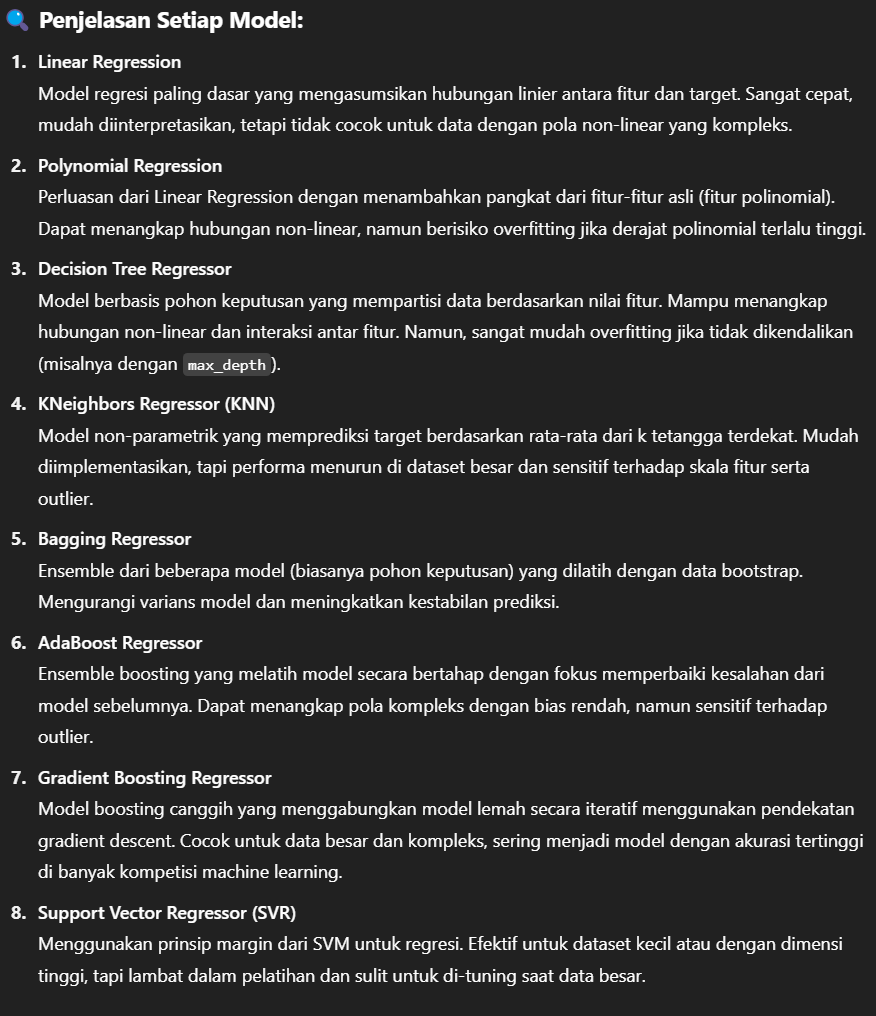

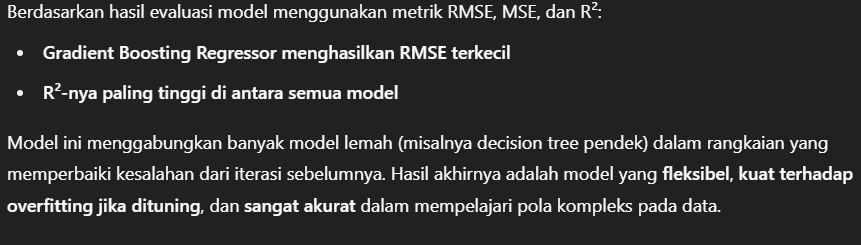